In [ ]:
#@title Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Constructing VGG Model
from tensorflow.keras import layers
from tensorflow.keras import models
import keras

# Defining Model
model=models.Sequential()

# Block 1
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu",input_shape=(224,224,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Normalization())

# Block 2
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Normalization())

# Block 3
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Normalization())

# Block 4
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Normalization())

# Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))

# Output Layer
model.add(layers.Dense(3, activation="softmax"))

In [ ]:
#@title Summarizing Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 normalization (Normalizatio  (None, 111, 111, 32)     65        
 n)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [ ]:
#@title Compiling Model
from tensorflow.keras import optimizers
opt = optimizers.Adam()

model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

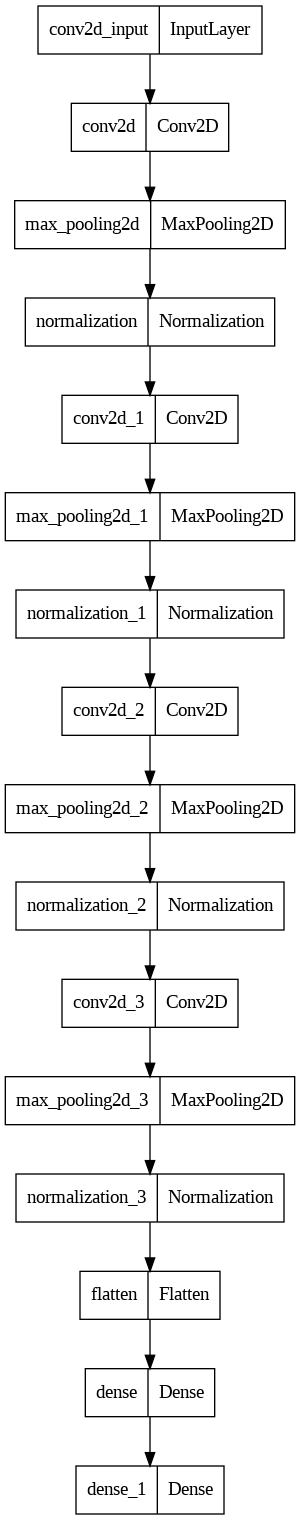

In [ ]:
#@title Plotting Model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
# @title Paths For Our Data
import os,shutil

# Setting Paths to the Directory
test_dataset_dir='/content/drive/MyDrive/Version 2, erythrocytesIDB 2021/Version 2, erythrocytesIDB 2021/erythrocytesIDB1/Test'
train_dataset_dir='/content/drive/MyDrive/Version 2, erythrocytesIDB 2021/Version 2, erythrocytesIDB 2021/erythrocytesIDB1/Train/'
validation_dataset_dir='/content/drive/MyDrive/Version 2, erythrocytesIDB 2021/Version 2, erythrocytesIDB 2021/erythrocytesIDB1/Validation/'

# Path of original dataset
base_dir='/content/drive/MyDrive/Version 2, erythrocytesIDB 2021/'
try:
  os.mkdir(base_dir)
except:
  pass

######################################################################
# Train, validation and test split
# Directories for training data
train_dir=os.path.join(base_dir,'train')
try:
  os.mkdir(train_dir)
except:
  pass

# Directories for validating data
validation_dir=os.path.join(base_dir,'validation')
try:
  os.mkdir(validation_dir)
except:
  pass

# Directories for testing data
test_dir=os.path.join(base_dir,'test')
try:
  os.mkdir(test_dir)
except:
  pass


In [ ]:
# @title Organizing Data Folders
import os,shutil
import cv2
import numpy as np


image_size=224


# Splitting Train data into 3 types
# Directory for training circular images
train_circular_dir=os.path.join(train_dir,'circular')
try:
  os.mkdir(train_circular_dir)
except:
  pass

# Directory for training elongated images
train_elongated_dir=os.path.join(train_dir,'elongated')
try:
  os.mkdir(train_elongated_dir)
except:
  pass

# Directory for training other images
train_other_dir=os.path.join(train_dir,'other')
try:
  os.mkdir(train_other_dir)
except:
  pass

######################################################################
# Splitting Validation data into 3 types
# Directory for validation circular images
validation_circular_dir=os.path.join(validation_dir,'circular')
try:
  os.mkdir(validation_circular_dir)
except:
  pass

# Directory for validation elongated images
validation_elongated_dir=os.path.join(validation_dir,'elongated')
try:
  os.mkdir(validation_elongated_dir)
except:
  pass

# Directory for validation other images
validation_other_dir=os.path.join(validation_dir,'other')
try:
  os.mkdir(validation_other_dir)
except:
  pass

######################################################################
# Splitting Test data into 3 types
# Directory for test circular images
test_circular_dir=os.path.join(test_dir,'circular')
try:
  os.mkdir(test_circular_dir)
except:
  pass

# Directory for test elongated images
test_elongated_dir=os.path.join(test_dir,'elongated')
try:
  os.mkdir(test_elongated_dir)
except:
  pass

# Directory for test other images
test_other_dir=os.path.join(test_dir,'other')
try:
  os.mkdir(test_other_dir)
except:
  pass

######################################################################
# Copying to train_circular_dir
fnames=['c({}).jpg'.format(i) for i in range(1,203)]
for fnames in fnames:
  src=os.path.join(train_dataset_dir,'circular',fnames)
  dst=os.path.join(train_circular_dir,fnames)
  shutil.copyfile(src,dst)

# Copying to validation_circular_dir
fnames=['c({}).jpg'.format(i) for i in range(1,112)]
for fnames in fnames:
  src=os.path.join(validation_dataset_dir,'circular',fnames)
  dst=os.path.join(validation_circular_dir,fnames)
  shutil.copyfile(src,dst)

# Copying to test_circular_dir
fnames=['c({}).jpg'.format(i) for i in range(1,92)]
for fnames in fnames:
  src=os.path.join(test_dataset_dir,'circular',fnames)
  dst=os.path.join(test_circular_dir,fnames)
  shutil.copyfile(src,dst)

######################################################################
# Copying to train_elongated_dir
fnames=['e({}).jpg'.format(i) for i in range(1,212)]
for fnames in fnames:
  src=os.path.join(train_dataset_dir,'elongated',fnames)
  dst=os.path.join(train_elongated_dir,fnames)
  shutil.copyfile(src,dst)

# Copying to validation_elongated_dir
fnames=['e({}).jpg'.format(i) for i in range(1,121)]
for fnames in fnames:
  src=os.path.join(validation_dataset_dir,'elongated',fnames)
  dst=os.path.join(validation_elongated_dir,fnames)
  shutil.copyfile(src,dst)

# Copying to test_elongated_dir
fnames=['e({}).jpg'.format(i) for i in range(1,91)]
for fnames in fnames:
  src=os.path.join(test_dataset_dir,'elongated',fnames)
  dst=os.path.join(test_elongated_dir,fnames)
  shutil.copyfile(src,dst)

######################################################################
# Copying to train_other_dir
fnames=['o({}).jpg'.format(i) for i in range(1,213)]
for fnames in fnames:
  src=os.path.join(train_dataset_dir,'other',fnames)
  dst=os.path.join(train_other_dir,fnames)
  shutil.copyfile(src,dst)

# Copying to validation_other_dir
fnames=['o({}).jpg'.format(i) for i in range(1,109)]
for fnames in fnames:
  src=os.path.join(validation_dataset_dir,'other',fnames)
  dst=os.path.join(validation_other_dir,fnames)
  shutil.copyfile(src,dst)

# Copying to test_other_dir
fnames=['o({}).jpg'.format(i) for i in range(1,104)]
for fnames in fnames:
  src=os.path.join(test_dataset_dir,'other',fnames)
  dst=os.path.join(test_other_dir,fnames)
  shutil.copyfile(src,dst)
  

In [ ]:
#@title Loading and Preprocessing Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_width=224
img_height=224
batchSize=20

# Scaling Image
train_datagen = ImageDataGenerator(
    rescale=1./255,
    )
val_datagen = ImageDataGenerator(
    rescale=1./255
    )
test_datagen = ImageDataGenerator(
    rescale=1./255
    )

# Loading train Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=batchSize,
    class_mode='categorical',
    shuffle=True,
    target_size=(img_width, img_height),
)

# Loading Validating Data
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    batch_size=batchSize,
    class_mode='categorical',
    shuffle=True,
    target_size=(img_width, img_height)
)

# Loading Testing Data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=batchSize,
    class_mode='categorical',
    shuffle=False,
    target_size=(img_width, img_height)
)

Found 625 images belonging to 3 classes.
Found 340 images belonging to 3 classes.
Found 284 images belonging to 3 classes.


In [ ]:
#@title Monitor and Control Training
from keras import callbacks

earlyStop = callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=15,
    verbose=1,
    mode='auto'
)

In [ ]:
#@title Fitting Model
history= model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batchSize,
    callbacks=[earlyStop]
)

Epoch 1/100
10/10 [==============================] - 15s 213ms/step - loss: 1.3354 - accuracy: 0.3150 - val_loss: 1.0973 - val_accuracy: 0.4382
Epoch 2/100
10/10 [==============================] - 2s 188ms/step - loss: 1.1077 - accuracy: 0.3297 - val_loss: 1.1001 - val_accuracy: 0.3265
Epoch 3/100
10/10 [==============================] - 1s 153ms/step - loss: 1.0975 - accuracy: 0.3027 - val_loss: 1.0980 - val_accuracy: 0.3559
Epoch 4/100
10/10 [==============================] - 2s 158ms/step - loss: 1.1033 - accuracy: 0.4000 - val_loss: 1.0917 - val_accuracy: 0.3176
Epoch 5/100
10/10 [==============================] - 2s 177ms/step - loss: 1.0599 - accuracy: 0.4162 - val_loss: 1.0767 - val_accuracy: 0.3706
Epoch 6/100
10/10 [==============================] - 2s 218ms/step - loss: 1.0596 - accuracy: 0.4541 - val_loss: 1.0044 - val_accuracy: 0.3941
Epoch 7/100
10/10 [==============================] - 2s 157ms/step - loss: 0.9695 - accuracy: 0.5135 - val_loss: 0.8206 - val_accuracy: 0.608

In [ ]:
#@title Saving Model
model.save('/content/drive/MyDrive/vgg16.h5')

In [1]:
#@title Loading Model
from tensorflow.keras.models import load_model
saved_model=load_model('/content/drive/MyDrive/vgg16.h5')

In [ ]:
#@title Importing Testing Images
import cv2
import matplotlib.pyplot as plt
import numpy as np

test_pred = model.predict(test_generator)
test_pred = np.argmax(test_pred,axis=1)
print(test_pred)

15/15 [==============================] - 1s 51ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2]


In [ ]:
print (test_generator.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
# @title Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_generator.classes,test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        91
           1       1.00      1.00      1.00        90
           2       1.00      0.96      0.98       103

    accuracy                           0.99       284
   macro avg       0.99      0.99      0.99       284
weighted avg       0.99      0.99      0.99       284



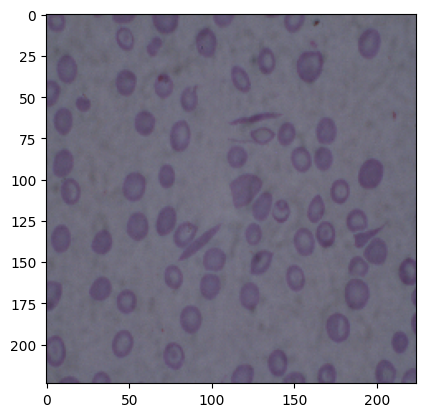

In [ ]:
#@title Importing and Showing Image
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('/content/drive/MyDrive/source.jpg')
img = cv2.resize(img,(224,224))
plt.imshow(img)

In [ ]:
#@title Predicting Image
pred=saved_model.predict(img.reshape(1,224,224,3))

print(pred)

1/1 [==============================] - 0s 22ms/step
[[0. 1. 0.]]


In [ ]:
#@title Extract the Largest Value
import numpy as np

x=np.argmax(pred)
print(x)

1


In [ ]:
#@title Display Results

if x == 0:
    print("circular")
elif x == 1:
    print("elongated")
else:
    print("other")

elongated


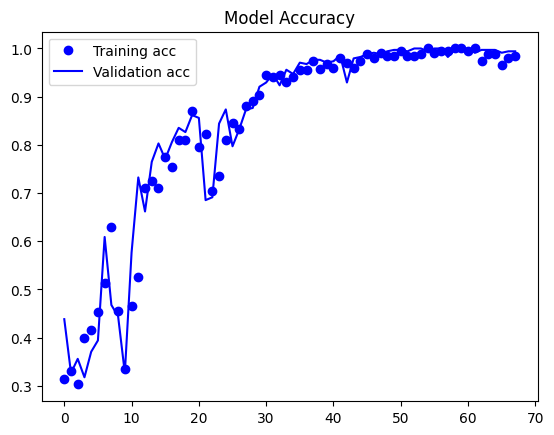

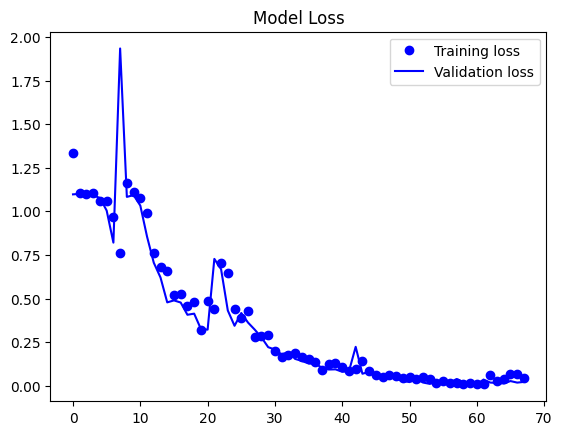

<Figure size 640x480 with 0 Axes>

In [ ]:
#@title Visualize Model Accuracy and Loss
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

# Plot training and validation acccuracy
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title("Model Accuracy")
plt.legend()
plt.figure()

# Plot training and validation loss
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title("Model Loss")
plt.legend()
plt.figure()
plt.show()

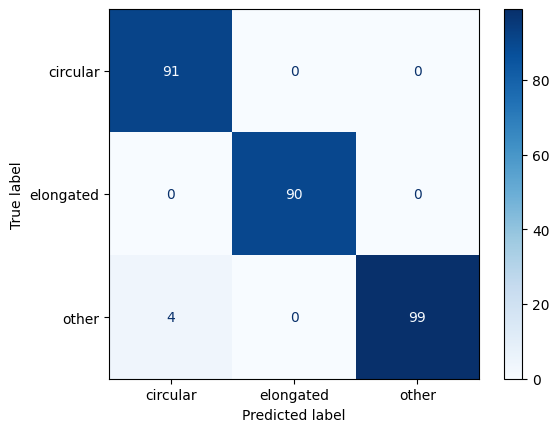

In [ ]:
#@title Confusion Matrix Heatmap
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

c_matrix = confusion_matrix(test_generator.classes,test_pred)
cm_display= ConfusionMatrixDisplay(confusion_matrix=c_matrix,display_labels=test_generator.class_indices)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [3]:
#@title Convert the h5 model into tflite

from tensorflow import lite
converter= lite.TFLiteConverter.from_keras_model(model=saved_model)
tflite_model=converter.convert()
open('/content/drive/MyDrive/vgg16.tflite','wb').write(tflite_model)


77070172